In [2]:
import pandas as pd

In [3]:
path = '../data/depGeneID_2_6_0.2_no_abs_FINAL/'
path2 = '../data/metacycle_outputs/metacycle_processed/'

In [4]:
nr1d1_genes = pd.read_csv(path + 'nr1d1_dep_geneID.txt', header=0)['CycID']
hdac3_genes = pd.read_csv(path + 'hdac3_dep_geneID.txt', header=0)['CycID']
nfil3_genes = pd.read_csv(path + 'nfil3_dep_geneID.txt', header=0)['CycID']
core_genes = pd.read_csv(path + 'core_genes.txt',header = None)[0]

In [5]:
meta2d_nr1d1 = pd.read_csv(path2 + 'meta2d_nr1d1.csv', index_col='CycID')
meta2d_hdac3 = pd.read_csv(path2 + 'meta2d_hdac3.csv', index_col='CycID')
meta2d_nfil3 = pd.read_csv(path2 + 'meta2d_nfil3.csv', index_col='CycID')
meta2d_nr1d1['group'] = 'NR1D1'
meta2d_hdac3['group'] = 'HDAC3'
meta2d_nfil3['group'] = 'NFIL3'

In [6]:
def ProcessDataForViolinPlot(df, group):
    wt = pd.DataFrame({'phase': df['WT_meta2d_phase'],'group': group, 'genotype': 'WT', 'rAMP': df['WT_meta2d_rAMP'],'AMP':df['WT_meta2d_AMP']})
    ko = pd.DataFrame({'phase': df['KO_meta2d_phase'],'group': group, 'genotype': 'KO', 'rAMP': df['KO_meta2d_rAMP'],'AMP':df['KO_meta2d_AMP']})
    return pd.concat([wt, ko])

nr1d1 = ProcessDataForViolinPlot(meta2d_nr1d1, 'NR1D1')
hdac3 = ProcessDataForViolinPlot(meta2d_hdac3, 'HDAC3')
nfil3 = ProcessDataForViolinPlot(meta2d_nfil3, 'NFIL3')

comb_df = pd.concat([nr1d1, hdac3, nfil3])
comb_df

,phase,group,genotype,rAMP,AMP
CycID,,,,,
0610007C21Rik,21.262371,NR1D1,WT,0.071115,1.218733
0610007N19Rik,4.726291,NR1D1,WT,0.355026,1.016610
0610007P08Rik,3.753143,NR1D1,WT,0.130788,0.356258
0610007P22Rik,9.978009,NR1D1,WT,0.246031,0.802133
0610008F07Rik,14.181801,NR1D1,WT,0.479637,1.169345
...,...,...,...,...,...
Zswim3,1.064522,NFIL3,KO,0.018445,0.026866
Zswim5,0.348070,NFIL3,KO,0.058549,0.269290
Zxdc,1.182336,NFIL3,KO,0.198772,0.596425


In [7]:
phase_filt = comb_df['phase'] > 24
comb_df.loc[phase_filt,'phase'] = comb_df.loc[phase_filt,'phase'] - 24
#make sure that phase value is between 0 and 24

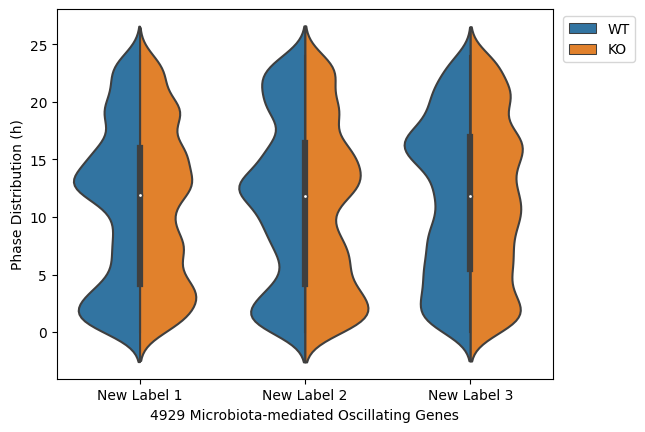

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(data=comb_df, x='group', y='phase', hue='genotype', split=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.18, 1))
plt.ylabel('Phase Distribution (h)')
plt.xlabel('4929 Microbiota-mediated Oscillating Genes')
plt.xticks(ticks=[0, 1, 2], labels=['New Label 1', 'New Label 2', 'New Label 3'])
plt.show()

<Axes: xlabel='group', ylabel='rAMP'>

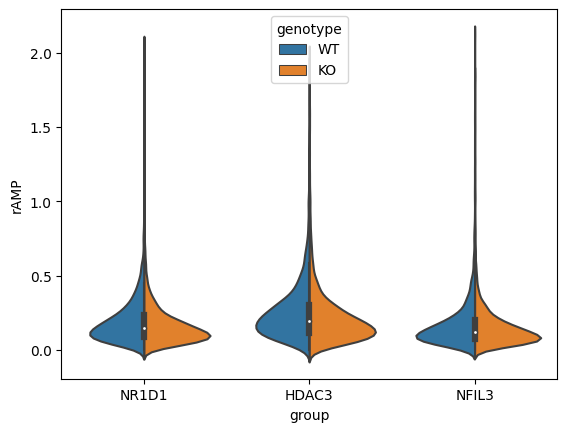

In [9]:
import seaborn as sns
sns.violinplot(data=comb_df, x='group', y='rAMP', hue='genotype', split=True, cut=2)

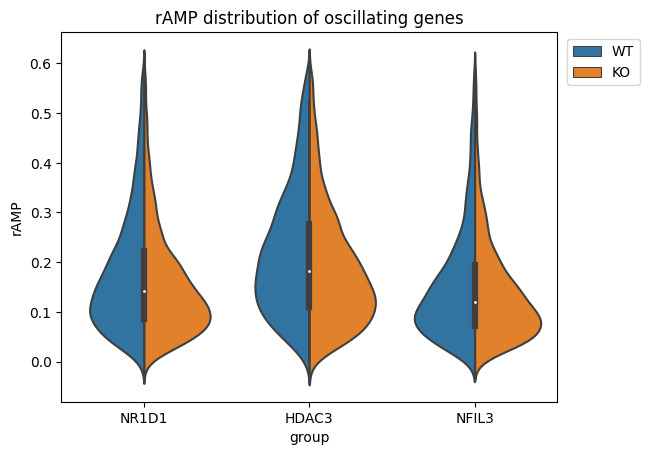

In [10]:
# Remove outliers based on the interquartile range (IQR)
Q1 = comb_df['rAMP'].quantile(0.20)
Q3 = comb_df['rAMP'].quantile(0.80)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = comb_df[(comb_df['rAMP'] >= lower_bound) & (comb_df['rAMP'] <= upper_bound)]

# Plot violin plot without outliers
sns.violinplot(data=filtered_df, x='group', y='rAMP', hue='genotype', split=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.18, 1))
plt.title('rAMP distribution of oscillating genes')
plt.show()

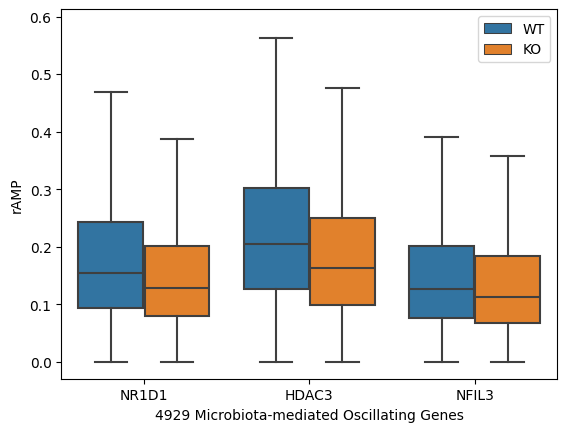

In [11]:
import seaborn as sns
sns.boxplot(data=filtered_df, x="group", y="rAMP", hue="genotype", fliersize=0)
plt.legend(loc='upper right')
plt.xlabel('4929 Microbiota-mediated Oscillating Genes')

plt.show()

In [12]:
#use a t-test to compare the means of the two groups
from scipy import stats
import numpy as np
def ttest(group1, group2):
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return t_stat, p_value

nr1d1_wt_ramp = filtered_df[(filtered_df['group'] == 'NR1D1') & (filtered_df['genotype'] == 'WT')]['rAMP']
nr1d1_ko_ramp = filtered_df[(filtered_df['group'] == 'NR1D1') & (filtered_df['genotype'] == 'KO')]['rAMP']
hdac3_wt_ramp = filtered_df[(filtered_df['group'] == 'HDAC3') & (filtered_df['genotype'] == 'WT')]['rAMP']
hdac3_ko_ramp = filtered_df[(filtered_df['group'] == 'HDAC3') & (filtered_df['genotype'] == 'KO')]['rAMP']
nfil3_wt_ramp = filtered_df[(filtered_df['group'] == 'NFIL3') & (filtered_df['genotype'] == 'WT')]['rAMP']
nfil3_ko_ramp = filtered_df[(filtered_df['group'] == 'NFIL3') & (filtered_df['genotype'] == 'KO')]['rAMP']

print('NR1D1', ttest(nr1d1_wt_ramp, nr1d1_ko_ramp))
print('HDAC3', ttest(hdac3_wt_ramp, hdac3_ko_ramp))
print('NFIL3', ttest(nfil3_wt_ramp, nfil3_ko_ramp))

NR1D1 (11.586446424400995, 7.742860687401079e-31)
HDAC3 (14.7847321269303, 6.657562402565186e-49)
NFIL3 (6.369401338625758, 1.9845027560821394e-10)


## How Does Distribution Change When Comparing Dependent Genes Only?

In [13]:
meta2d_nr1d1_dep = meta2d_nr1d1.loc[nr1d1_genes,:]
meta2d_hdac3_dep = meta2d_hdac3.loc[hdac3_genes,:]
meta2d_nfil3_dep = meta2d_nfil3.loc[nfil3_genes,:]

In [14]:
nr1d1dep = ProcessDataForViolinPlot(meta2d_nr1d1_dep, 'NR1D1')
hdac3dep = ProcessDataForViolinPlot(meta2d_hdac3_dep, 'HDAC3')
nfil3dep = ProcessDataForViolinPlot(meta2d_nfil3_dep, 'NFIL3')

dep_comb_df = pd.concat([nr1d1dep, hdac3dep, nfil3dep])
dep_comb_df

,phase,group,genotype,rAMP,AMP
CycID,,,,,
0610007C21Rik,21.262371,NR1D1,WT,0.071115,1.218733
0610007N19Rik,4.726291,NR1D1,WT,0.355026,1.016610
0610007P08Rik,3.753143,NR1D1,WT,0.130788,0.356258
0610007P22Rik,9.978009,NR1D1,WT,0.246031,0.802133
0610008F07Rik,14.181801,NR1D1,WT,0.479637,1.169345
...,...,...,...,...,...
Znrf2,9.385129,NFIL3,KO,0.042263,0.559514
Zranb1,14.414391,NFIL3,KO,0.063097,0.350990
Zswim3,1.064522,NFIL3,KO,0.018445,0.026866


In [19]:
phase_filt_dep = dep_comb_df['phase'] > 24
dep_comb_df.loc[phase_filt_dep,'phase'] = dep_comb_df.loc[phase_filt_dep,'phase'] - 24
#make sure that phase value is between 0 and 24

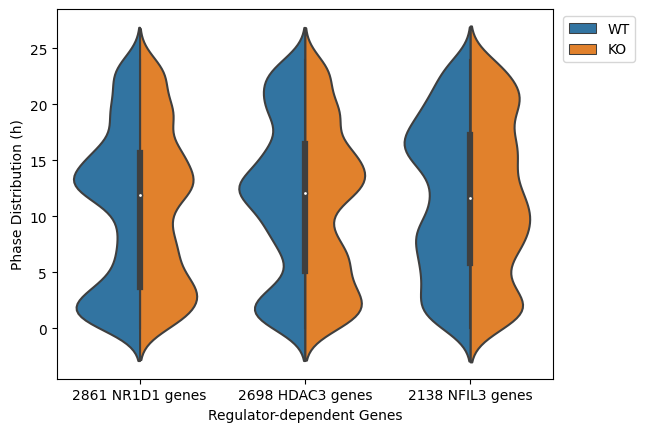

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(data=dep_comb_df, x='group', y='phase', hue='genotype', split=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.18, 1))
plt.ylabel('Phase Distribution (h)')
plt.xlabel('Regulator-dependent Genes')
plt.xticks(ticks=[0, 1, 2], labels=['2861 NR1D1 genes', '2698 HDAC3 genes', '2138 NFIL3 genes'])
plt.show()

In [22]:
phase_filt_dep

CycID
0610007C21Rik    False
0610007N19Rik    False
0610007P08Rik    False
0610007P22Rik    False
0610008F07Rik    False
                 ...  
Znrf2            False
Zranb1           False
Zswim3           False
Zswim5           False
Zzef1            False
Name: phase, Length: 15394, dtype: bool

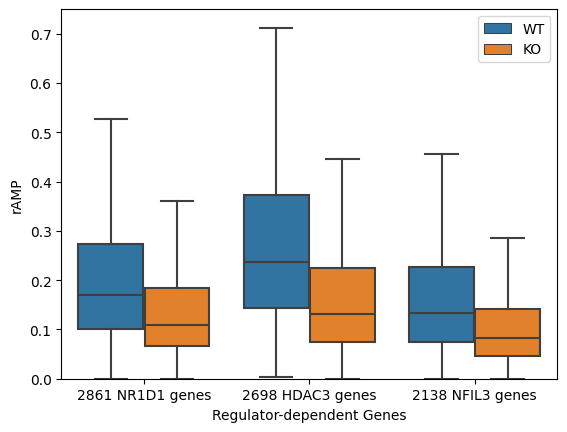

In [29]:
import seaborn as sns
sns.boxplot(data=dep_comb_df, x="group", y="rAMP", hue="genotype", fliersize=0)
plt.legend(loc='upper right')
plt.ylim(0, 0.75)
plt.xlabel('Regulator-dependent Genes')
plt.xticks(ticks=[0, 1, 2], labels=['2861 NR1D1 genes', '2698 HDAC3 genes', '2138 NFIL3 genes'])

plt.show()